### Install packages

In [1]:
library("caret")
library("ellipse")
library("e1071")
library("kernlab")
library("randomForest")

Warning message:
“package ‘caret’ was built under R version 4.0.5”
Loading required package: lattice

Warning message:
“package ‘lattice’ was built under R version 4.0.3”
Loading required package: ggplot2

Warning message:
“package ‘ggplot2’ was built under R version 4.0.5”
Warning message:
“package ‘ellipse’ was built under R version 4.0.5”

Attaching package: ‘ellipse’


The following object is masked from ‘package:graphics’:

    pairs


Warning message:
“package ‘e1071’ was built under R version 4.0.5”
Warning message:
“package ‘kernlab’ was built under R version 4.0.5”

Attaching package: ‘kernlab’


The following object is masked from ‘package:ggplot2’:

    alpha


Warning message:
“package ‘randomForest’ was built under R version 4.0.3”
randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




### Load iris dataset

In [2]:
# attach the iris dataset to the environment
data(iris)
# rename the dataset
dataset <- iris

### Create a validation datastet

In [3]:
# create a list of 80% of the rows in the original dataset we can use for training
validation_index <- createDataPartition(dataset$Species, p=0.80, list=FALSE)
# select 20% of the data for validation
validation <- dataset[-validation_index,]
# use the remaining 80% of data to training and testing the models
dataset <- dataset[validation_index,]

### Look at characteristics of data

In [4]:
# dimensions of dataset
dim(dataset)

[1] 120   5

In [5]:
# list types for each attribute
sapply(dataset, class)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
   "numeric"    "numeric"    "numeric"    "numeric"     "factor"

In [6]:
# take a peek at the first 5 rows of the data
head(dataset)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
8,5.0,3.4,1.5,0.2,setosa


In [7]:
# list the levels for the class
levels(dataset$Species)

[1] "setosa"     "versicolor" "virginica"

In [8]:
# summarize the class distribution
percentage <- prop.table(table(dataset$Species)) * 100
cbind(freq=table(dataset$Species), percentage=percentage)

,freq,percentage
setosa,40,33.33333
versicolor,40,33.33333
virginica,40,33.33333


In [9]:
# summarize attribute distributions
summary(dataset)

  Sepal.Length   Sepal.Width     Petal.Length    Petal.Width          Species  
 Min.   :4.40   Min.   :2.000   Min.   :1.000   Min.   :0.100   setosa    :40  
 1st Qu.:5.10   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.200   versicolor:40  
 Median :5.75   Median :3.000   Median :4.250   Median :1.300   virginica :40  
 Mean   :5.83   Mean   :3.062   Mean   :3.738   Mean   :1.199                  
 3rd Qu.:6.40   3rd Qu.:3.325   3rd Qu.:5.100   3rd Qu.:1.800                  
 Max.   :7.90   Max.   :4.400   Max.   :6.900   Max.   :2.500                  

### Visualize Dataset

#### Univariate Plots

In [10]:
# split input and output
x <- dataset[,1:4]
y <- dataset[,5]

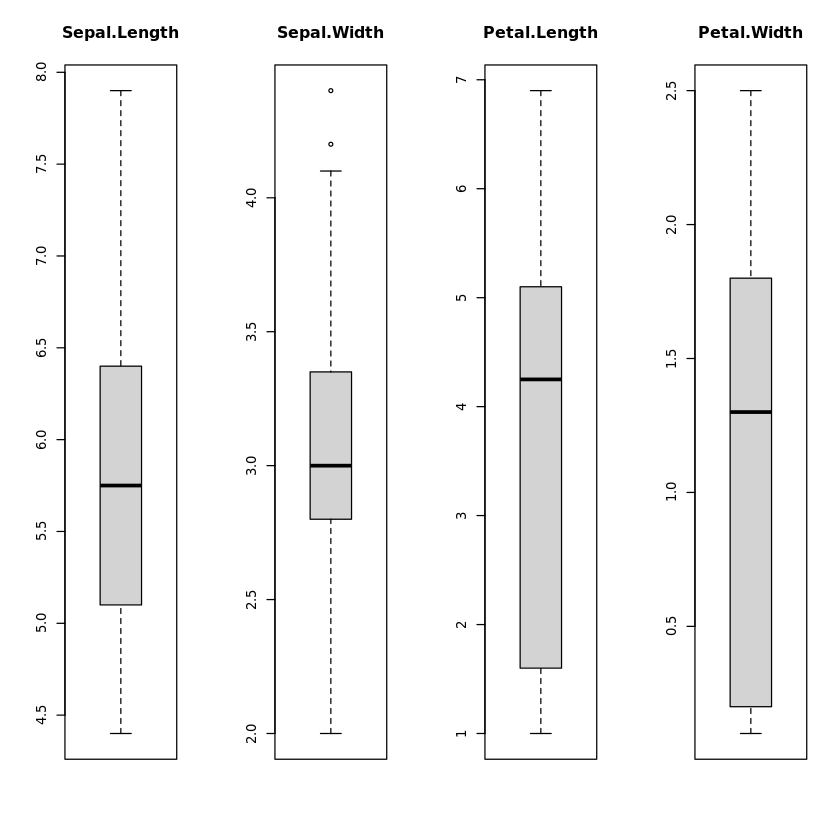

In [11]:
# boxplot for each attribute on one image
par(mfrow=c(1,4))
  for(i in 1:4) {
  boxplot(x[,i], main=names(iris)[i])
}

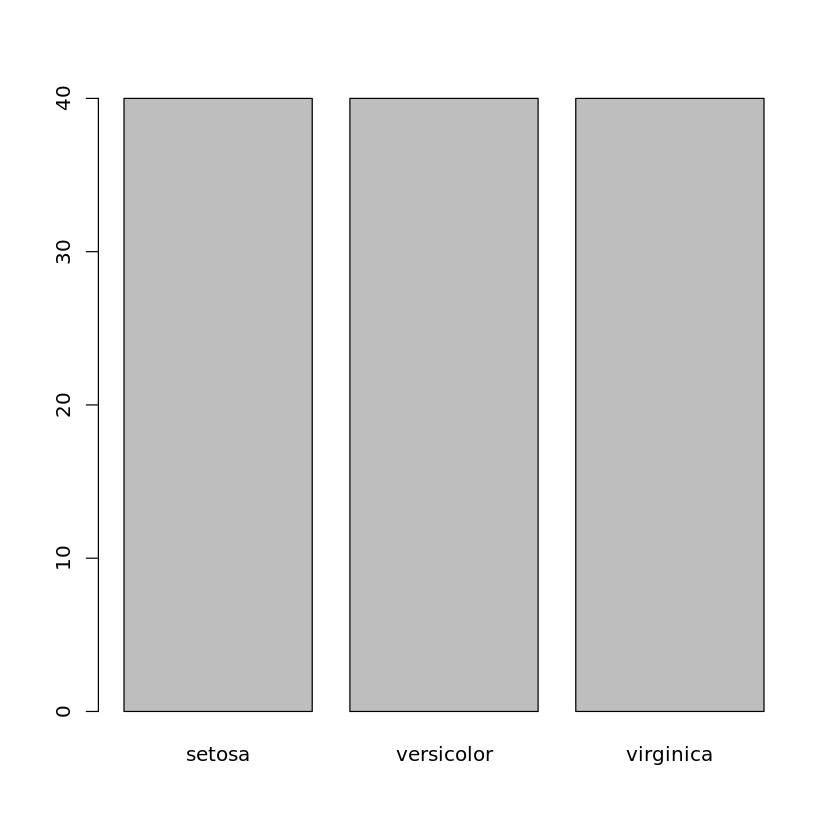

In [12]:
# barplot for class breakdown
plot(y)

#### Multivariate Plots

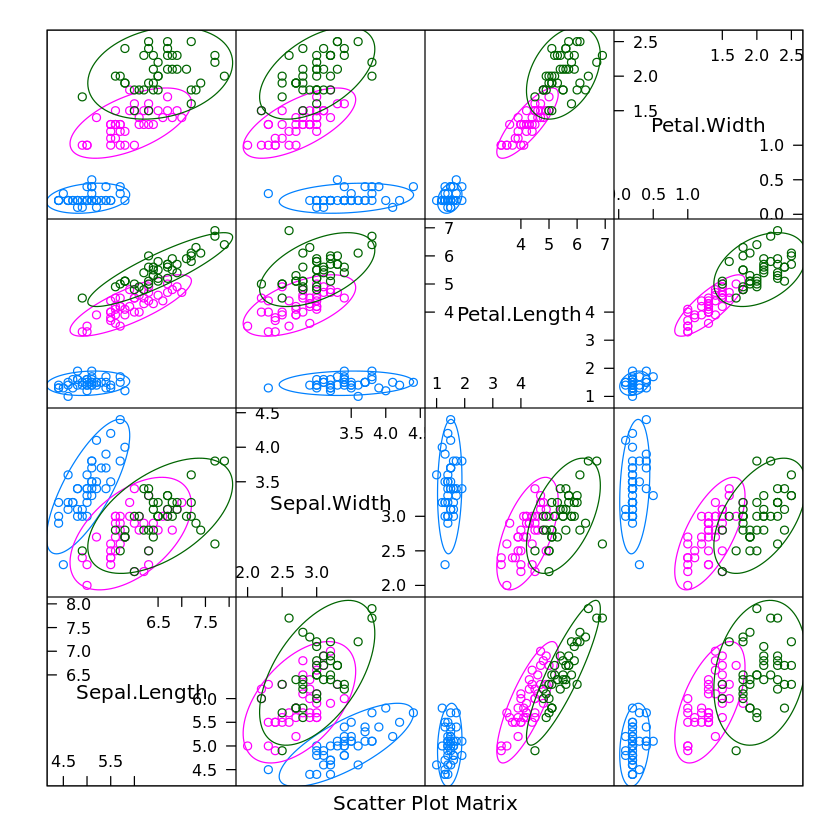

In [13]:
# scatterplot matrix
featurePlot(x=x, y=y, plot="ellipse")

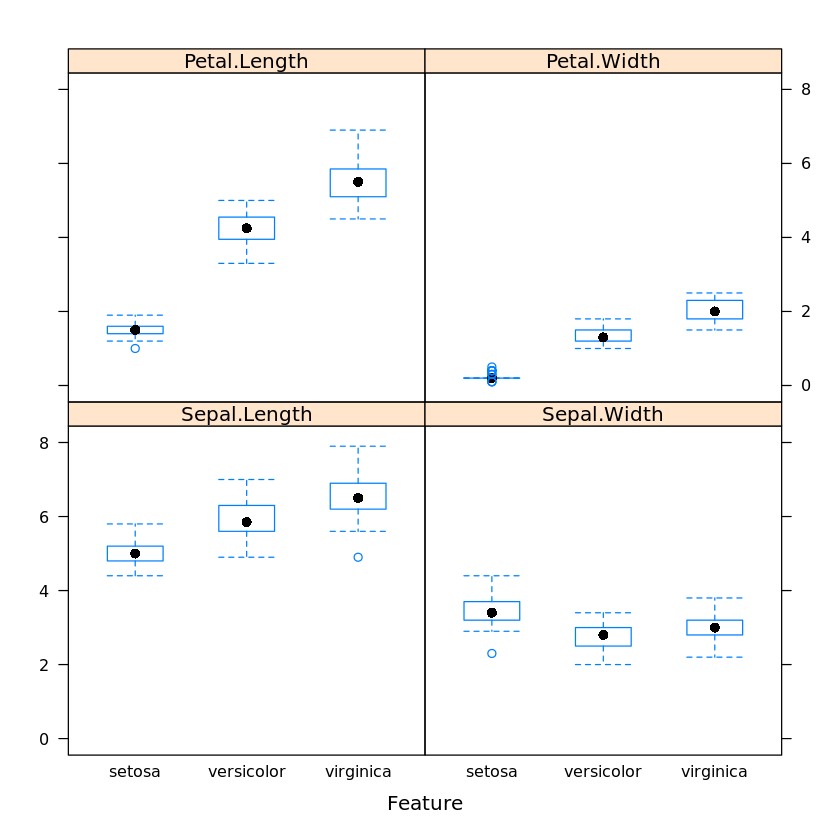

In [14]:
# box and whisker plots for each attribute
featurePlot(x=x, y=y, plot="box")

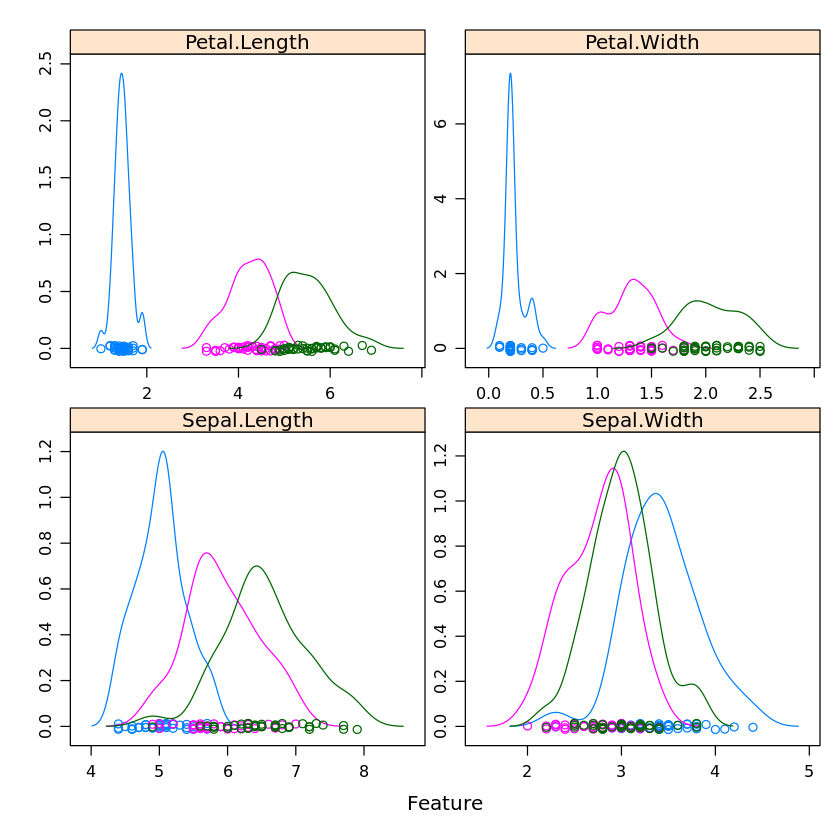

In [15]:
# density plots for each attribute by class value
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)

### Evaluating Algorithms

#### Test harness

In [16]:
# Run algorithms using 10-fold cross validation
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

#### Build models

In [18]:
# a) linear algorithms
set.seed(7)
fit.lda <- train(Species~., data=dataset, method="lda", metric=metric, trControl=control)
# b) nonlinear algorithms
# CART
set.seed(7)
fit.cart <- train(Species~., data=dataset, method="rpart", metric=metric, trControl=control)
# kNN
set.seed(7)
fit.knn <- train(Species~., data=dataset, method="knn", metric=metric, trControl=control)
# c) advanced algorithms
# SVM
set.seed(7)
fit.svm <- train(Species~., data=dataset, method="svmRadial", metric=metric, trControl=control)
# Random Forest
set.seed(7)
fit.rf <- train(Species~., data=dataset, method="rf", metric=metric, trControl=control)

#### Evaluate each model and select best

In [19]:
# summarize accuracy of models
results <- resamples(list(lda=fit.lda, cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)


Call:
summary.resamples(object = results)

Models: lda, cart, knn, svm, rf 
Number of resamples: 10 

Accuracy 
          Min.   1st Qu.    Median      Mean   3rd Qu. Max. NA's
lda  0.9166667 1.0000000 1.0000000 0.9833333 1.0000000    1    0
cart 0.7500000 0.8541667 0.9166667 0.9083333 0.9791667    1    0
knn  0.9166667 1.0000000 1.0000000 0.9833333 1.0000000    1    0
svm  0.9166667 0.9166667 1.0000000 0.9666667 1.0000000    1    0
rf   0.9166667 0.9166667 1.0000000 0.9666667 1.0000000    1    0

Kappa 
      Min. 1st Qu. Median   Mean 3rd Qu. Max. NA's
lda  0.875 1.00000  1.000 0.9750 1.00000    1    0
cart 0.625 0.78125  0.875 0.8625 0.96875    1    0
knn  0.875 1.00000  1.000 0.9750 1.00000    1    0
svm  0.875 0.87500  1.000 0.9500 1.00000    1    0
rf   0.875 0.87500  1.000 0.9500 1.00000    1    0


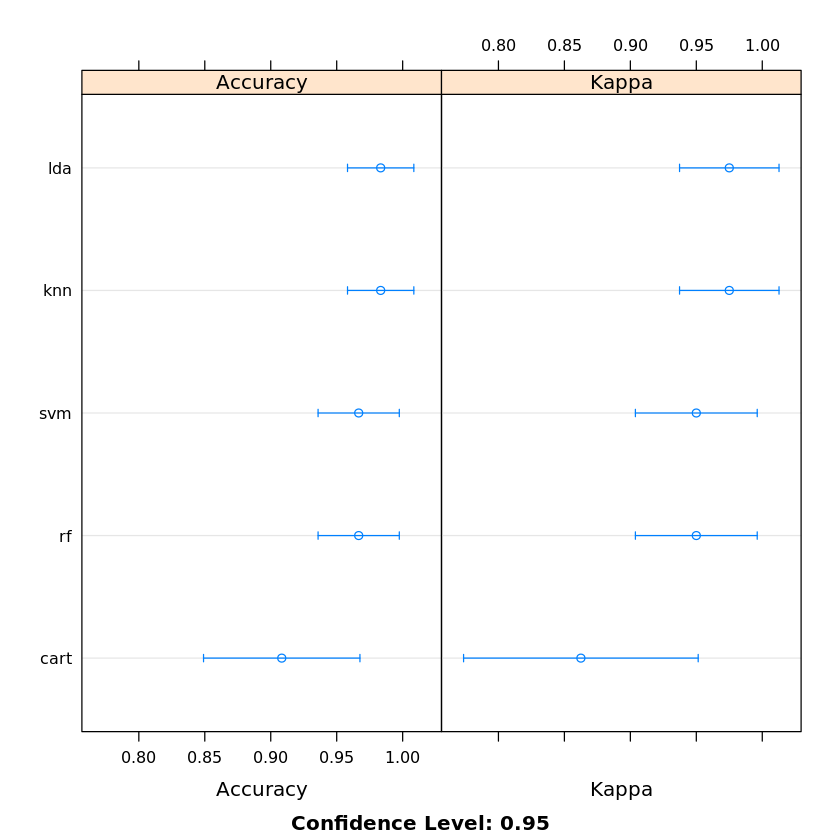

In [20]:
# compare accuracy of models
dotplot(results)

In [21]:
# summarize Best Model
print(fit.lda)

Linear Discriminant Analysis 

120 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results:

  Accuracy   Kappa
  0.9833333  0.975



### Make Predictions

In [23]:
# estimate skill of LDA on the validation dataset
predictions <- predict(fit.lda, validation)
confusionMatrix(predictions, validation$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         10          0         0
  versicolor      0          9         0
  virginica       0          1        10

Overall Statistics
                                          
               Accuracy : 0.9667          
                 95% CI : (0.8278, 0.9992)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 2.963e-13       
                                          
                  Kappa : 0.95            
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9000           1.0000
Specificity                 1.0000            1.0000           0.9500
Pos Pred Value              1.0000            1.0000           0.9091
Neg Pred Value              1.0000            0.9524           1.0000
P